# Occupancy Models with `Unmarked.jl`

### Fit a Model

First, load required packages:

In [1]:
using Unmarked, DataFrames

Simulate an occupancy dataset from formulas and known $\beta$ values:

In [2]:
ψ_formula = @formula(ψ~elev+forest);
p_formula = @formula(p~precip+wind);
β_truth = [0, -0.5, 1.2, -0.2, 0, 0.7];
umd = simulate(Occu, ψ_formula, p_formula, (1000, 5), β_truth);

Fit the model using the formulas and dataset from above:

In [3]:
fit = occu(ψ_formula, p_formula, umd);

### Examine Results

Summary of fitted coefficient values, standard errors, and confidence intervals:

In [4]:
fit


Occupancy: ψ ~ elev + forest
────────────────────────────────────────────────────────────────
             Estimate      SE      z  Pr(>|z|)  Low 95%   Up 95%
────────────────────────────────────────────────────────────────
(Intercept)    0.1105  0.0818   1.35    0.1767  -0.0498   0.2709
elev          -0.4975  0.0837   5.95    <1e-99  -0.6615  -0.3335
forest         1.4019  0.1114  12.59    <1e-99   1.1836   1.6202
────────────────────────────────────────────────────────────────

Detection: p ~ precip + wind
────────────────────────────────────────────────────────────────
             Estimate      SE      z  Pr(>|z|)  Low 95%   Up 95%
────────────────────────────────────────────────────────────────
(Intercept)   -0.2173  0.0471   4.62    <1e-99  -0.3095  -0.1251
precip         0.0099  0.0429   0.23    0.8168  -0.0741   0.094 
wind           0.7513  0.0483  15.54    <1e-99   0.6566   0.8461
────────────────────────────────────────────────────────────────



AIC: 4100.5431

Compare to known "true" coefficient values:

In [5]:
DataFrame(coef=coefnames(fit), model=round.(coef(fit), digits=1), 
          truth=β_truth)

,coef,model,truth
,String,Float64,Float64
1,(Intercept),0.1,0.0
2,elev,-0.5,-0.5
3,forest,1.4,1.2
4,(Intercept),-0.2,-0.2
5,precip,0.0,0.0
6,wind,0.8,0.7


### Plotting Results

In [6]:
using Gadfly
set_default_plot_size(15cm, 15cm)

Create a plot of coefficient values with 95% confidence intervals:

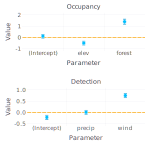

In [7]:
whiskerplot(fit)

Create a marginal effects plot for each covariate over its range:

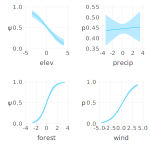

In [8]:
effectsplot(fit)

### Predict Values

Create a data frame containing covariate values for which we want to get predicted occupancy:

In [9]:
pr_df = DataFrame(elev=[0.5, -0.3], forest=[1,-1]);

Predict occupancy using the data frame:

In [10]:
predict(occupancy(fit), pr_df, interval=true) 

(prediction = [0.77966, 0.241928], lower = [0.727124, 0.199585], upper = [0.824522, 0.29])

### Goodness-of-Fit

Calculate MacKenzie-Bailey goodness-of-fit and $\hat{c}$ for the model: 

In [11]:
gof(fit)

Bootstrap (50 sims) 100%|███████████████████████████████| Time: 0:00:17



MacKenzie-Bailey Goodness-of-fit

  χ2 = 25.4500
  P-value = 0.7200
  Est. c-hat = 0.8567

### Model Selection

Fit models for all subsets of covariates:

In [12]:
fit_all = occu(allsub(ψ_formula), allsub(p_formula), umd);

Fitting 16 models 100%|█████████████████████████████████| Time: 0:00:08


Compare with AIC:

In [13]:
fit_all

┌─────┬──────────────────────────────┬─────────┬────────┬────────┐
│ No. │ Model                        │     AIC │  Δ AIC │ Weight │
├─────┼──────────────────────────────┼─────────┼────────┼────────┤
│ 12  │ ψ(elev+forest)p(wind)        │ 4098.60 │   0.00 │   0.73 │
│ 16  │ ψ(elev+forest)p(precip+wind) │ 4100.54 │   1.94 │   0.27 │
│ 11  │ ψ(forest)p(wind)             │ 4135.88 │  37.28 │   0.00 │
│ 15  │ ψ(forest)p(precip+wind)      │ 4137.81 │  39.21 │   0.00 │
│ 10  │ ψ(elev)p(wind)               │ 4356.25 │ 257.65 │   0.00 │
│ 14  │ ψ(elev)p(precip+wind)        │ 4358.05 │ 259.45 │   0.00 │
│ 4   │ ψ(elev+forest)p(.)           │ 4382.03 │ 283.43 │   0.00 │
│ 9   │ ψ(.)p(wind)                  │ 4382.46 │ 283.86 │   0.00 │
│ 8   │ ψ(elev+forest)p(precip)      │ 4383.61 │ 285.01 │   0.00 │
│ 13  │ ψ(.)p(precip+wind)           │ 4384.24 │ 285.64 │   0.00 │
│ 3   │ ψ(forest)p(.)                │ 4419.28 │ 320.68 │   0.00 │
│ 7   │ ψ(forest)p(precip)           │ 4420.81 │ 322.21 │   0.